<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# Taller 02: Probabilidad y estadística

## <span style="color:red"> Outline </span> 

1. [Ejercicio 1. Probabilidad](#eje1)
2. [Ejercicio 2. Teorema del límite central](#eje5)
3. [Ejercicio 3. Probabilidad](#eje6)
4. [Ejercicio 4. Generando distribuciones](#eje7)


In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
#import os
#from google.colab import drive
#drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201')
#os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
#print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

# Usted debe ejecutar <span style="color:#F00;">TODAS</span> las celdas de tipo <span style="color:#F00;">CODE</span>. De lo contrario, sus respuestas no serán procesadas correctamente.</h2>
---

---

### Ejercicio 1  <a name="eje1"></a>

Considere dos distribuciones normales, definidas de la siguiente manera:<br>
$N_1(\mu_1=4,\sigma_1=0.8)$ &nbsp;&nbsp; y &nbsp;&nbsp; $N_2(\mu_2=6,\sigma_2=1.2)$<br>
Suponga que las distribuciones se intersectan en el dato $x=4.9873136$
<br><br>
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/ejercicio_taller02.png" />
<br><br>
Determine el área (la probabilidad) de las zonas sombreadas.
<b>Nota:</b> utilice un objeto `scipy.stats`


In [2]:
def dinter12(m1,m2,std1,std2,x):
    import numpy as np
    import scipy.stats as stats
    from scipy.stats import norm
  
    n1=stats.norm(loc=m1, scale=std1)
    n2=stats.norm(loc=m2, scale=std2)
    area=(1-n1.cdf(x))+n2.cdf(x)
  
    return area

#Colaboratory
#import urllib.parse, inspect
#src12 = urllib.parse.quote_plus(inspect.getsource(dinter12))

#Virtualbox
import urllib, inspect
src12 = urllib.quote_plus(inspect.getsource(dinter12))

Verifica tu código:

In [3]:
import scipy.stats as stats
m1 = 4
std1 = 0.8
m2 = 6
std2 = 1.2
x = 4.9873136
dinter12(m1,m2,std1,std2,x)

0.30793615154973297

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [4]:
!./run CHECK_SOLUTION PS2_12 $src12

evaluation result CORRECT


### Ejercicio 2 <a name="eje5"></a>

Considere el dataset `../data/gapminder-FiveYearData.csv`. Queremos modelar la distribución de los datos la caracteristica: **"producto interno bruto"** (`gdpPercap`). Sin embargo no sabemos la forma de la distribución. Por lo tanto vamos a utilizar el teorema del límite central, para aproximar estos datos a la distribución normal: $\mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$. 

Contruya una función que: 

1. Calcule los promedios tomando $N = {10,20,40}$ muestras (realice 1000 iteraciones para cada $N$).
    - Cada conjunto de muestran son seleccionadas de forma aleatoria del conjunto de datos. 
2. Grafique un subplot con la forma de cada aproximación para los tres tamaños de muestra.
3. Devuelva la lista de los parametros de $\mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$(para cada N sobre las 1000 iteraciones)

In [5]:
def dinter14():
    import pandas as pd
    import numpy as np
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,3))

    data = pd.read_csv('misc/FiveYearData.csv')
    d_mean = np.mean(data.gdpPercap)
    d_std=np.std(data.gdpPercap)
   
    list_mu, list_std=[],[]

    for i,N in enumerate([10,20,40]):
        #print( i, N)
        sample_means = []
        # _ is a traditional name for "don't care" 
        for _ in range(1000):
            sample_of_size_N = data.gdpPercap.sample(N)
            sample_means.append(np.mean(sample_of_size_N))
        plt.subplot(1,3,i+1)
        x = np.linspace(min(sample_means),max(sample_means),100)
        plt.hist(sample_means, bins=30, density=True, alpha=.5, label="sample means");
        ref = stats.norm(loc=d_mean, scale=d_std/np.sqrt(N))
        plt.plot(x, ref.pdf(x), label="CLT analytic", color="blue")
        ref = stats.norm(loc=np.mean(sample_means), scale=np.std(sample_means))
        plt.plot(x, ref.pdf(x), label="CLT estimated", color="red")
        plt.title("N=%d"%N)
        list_mu.append(np.mean(sample_means))
        list_std.append(np.std(sample_means)/np.sqrt(N))
    plt.legend()
  
    return list_mu, list_std

#Colaboratory
#import urllib.parse, inspect
#src14 = urllib.parse.quote_plus(inspect.getsource(dinter14))

#Virtualbox
import urllib, inspect
src14 = urllib.quote_plus(inspect.getsource(dinter14))

comprueba el código

[7071.9538419453402, 7192.7615449486839, 7211.7940181481581]
[950.91533563356006, 490.09189209610696, 248.83138125206617]


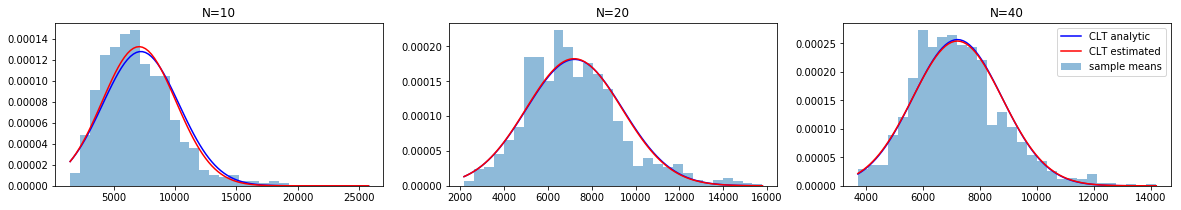

In [9]:
list_mu, list_std = dinter14()
print(list_mu)
print(list_std)

---


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [10]:
!./run CHECK_SOLUTION PS2_14 $src14

evaluation result CORRECT


### Ejercicio 3 <a name="eje6"></a>

Construya un función que calcule un conjunto de 10000 muestras que siguen una distribución de Poisson $X$ con media (lambda 4). Luego calcule el porcentaje de elementos de $X$ que están entre el intervalo (a - b) $\frac{eventos}{intervalo-tiempo}$.

<b>Nota:</b> Utilice numpy para generar una aproximación.

In [11]:
def eprob15(a,b):
    import numpy as np
    X = np.random.poisson(4,10000)
    count=0
    for i in X:
        if i>=a and i<=b:
            count=count+1
    prob=(count/10000.)
    return prob

#Colaboratory
#import urllib.parse, inspect
#src15 = urllib.parse.quote_plus(inspect.getsource(eprob15))

#Virtualbox
import urllib, inspect
src15 = urllib.quote_plus(inspect.getsource(eprob15))

Verifique su respuesta.

In [12]:
import numpy as np

a = 2
b = 7
eprob15(a,b)

0.8571

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [13]:
!./run CHECK_SOLUTION PS2_15 $src15

evaluation result CORRECT


---

### Ejercicio 4  <a name="eje7"></a>

Suponga que al momento de tirar una moneda usted puede obtener como resultado o CARA o SELLO. Sin embargo, si realizamos este mismo experimento 10 veces y se calculan las probabilidades no se obtendran los resultados mencionados. ¿Por qué? ¿Qué sucede si se ejecutan más veces?
En este ejercicio, usted deberá completar la función `tirar_moneda` la cual simula el experimento y lo ejecuta $N$ veces. Los resultados nos permitiran observar que sucede con las probabilidades cuando incrementamos el número de experimentos. 

In [17]:
def tirar_moneda():
    import numpy as np
    import scipy.stats as stats
    prob_caras = list()
    prob_sellos = list()
    for N in [10, 100, 1000, 10000]:
        resultados = list()
        # Crear el bucle que simula la ejecucion del experimento varias veces
        for i in range(1,N):
            # Generar una muestra (1) de una distribucion (media =0.5)
            # Solo  se obtienen dos posibles valores desde rvs
            intento = stats.binom(n=1, p=0.5).rvs(1) 
            resultados.append(intento[0])
        # Calcular la probabilidad de obtener caras=medias de caras    
        prob_caras.append(np.mean(resultados))
        # Calcular la probabilidad de obtener sellos= el complemento de las caras
        prob_sellos.append((1-np.mean(resultados)))
        
    return prob_caras, prob_sellos

#Colaboratory
#import urllib.parse, inspect
#src16 = urllib.parse.quote_plus(inspect.getsource(tirar_moneda))

#Virtualbox
import urllib, inspect
#print(inspect.getsource(tirar_moneda))
src16 = urllib.quote_plus(inspect.getsource(tirar_moneda))

Prueba el código:

In [18]:
prob_caras, prob_sellos = tirar_moneda()
print('Probabilidades de obtener caras: ', prob_caras)
print('Probabilidades de obtener sellos: ', prob_sellos)

('Probabilidades de obtener caras: ', [0.55555555555555558, 0.48484848484848486, 0.49149149149149152, 0.5027502750275028])
('Probabilidades de obtener sellos: ', [0.44444444444444442, 0.51515151515151514, 0.50850850850850848, 0.4972497249724972])


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [19]:
!./run CHECK_SOLUTION PS2_16 $src16

evaluation result CORRECT


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Pasos Finales. 



#### 1. Reemplace la variable con su código de estudiante

In [25]:
#Colaboratory
#import urllib.parse, inspect
#taller = urllib.parse.quote_plus("Taller_02_20201_Distribuciones.")
#codigo = urllib.parse.quote_plus("tl2_2170688")

#Virtualbox
import urllib, inspect
taller = urllib.quote_plus("Taller_02_20201_Distribuciones")
codigo = urllib.quote_plus("tl2_2170688")

print(taller, codigo)

('Taller_02_20201_Distribuciones', 'tl2_2170688')


#### 2. Guarde los cambios del taller:

In [26]:
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

#### 3. Ejecute la siguiente celda y envíe el archivo comprimido

In [24]:
!./convert_ipynb.sh $codigo $taller

uno: tl2_2170688 dos Taller_02_20201_Distribuciones.
cp: cannot stat 'Taller_02_20201_Distribuciones..ipynb': No such file or directory
ERROR!: NO FUE POSIBLE CREAR EL ARCHIVO!.


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>